<a href="https://colab.research.google.com/github/gyasifred/NLP-Techniques/blob/main/wordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
text = open('/content/abstract_mal.txt', encoding='utf-8').read()
text

"Using Machine Learning and Large Language Models to Automatically Detect Pediatric Malnutrition from Electronic Health Records: A Comparative Analysis of Multiple Models\nBackground\nPediatric malnutrition is significantly underdiagnosed in developed countries, with only 4% of cases identified despite a prevalence rate of 24-50%. Current diagnostic processes rely heavily on manual ICD coding, often hindered by insufficient clinical documentation and complex assessment requirements. Consequently, there are increased mortality risks, longer hospital stays, higher healthcare costs, and potential long-term effects on cognitive development. This study aims to develop and evaluate machine learning methods for the automated identification of pediatric malnutrition from clinical notes, addressing the critical gap between the actual prevalence of the condition and the number of documented cases.\nMethods\nThe study will utilize clinical notes from patients aged 2 to 18, extracted from the Medi

In [3]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [4]:
text = preprocessing(text)
text

'Using Machine Learning Large Language Models Automatically Detect Pediatric Malnutrition Electronic Health Records Comparative Analysis Multiple Models Background Pediatric malnutrition significantly underdiagnosed developed country case identified despite prevalence rate 24-50 Current diagnostic process rely heavily manual ICD coding often hindered insufficient clinical documentation complex assessment requirement Consequently increased mortality risk longer hospital stay higher healthcare cost potential long-term effect cognitive development This study aim develop evaluate machine learning method automated identification pediatric malnutrition clinical note addressing critical gap actual prevalence condition number documented case Methods The study utilize clinical note patient aged extracted Medical University South Carolina MUSC EPIC electronic health record EHR system covering 2015 2022 The patient categorized three group Malnutrition Group MAL Patients ICD-10 code indicating mal

In [14]:
wordcloud = WordCloud(max_words=50).generate(text)

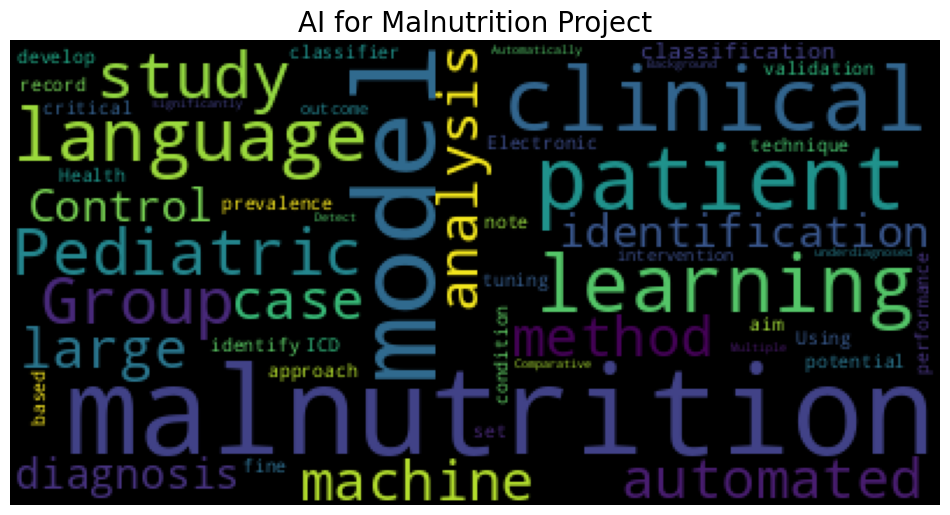

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('AI for Malnutrition Project', fontsize=20)
plt.axis("off")
plt.show()

In [7]:
from PIL import Image
import numpy as np

In [8]:
im = Image.open("/content/ai_for_malnutrition.png")
im.show()

In [9]:
_mask = np.array(im)

In [10]:
wc = WordCloud(background_color="white", max_words=100, mask=_mask)
# generate word cloud
wc.generate(text)

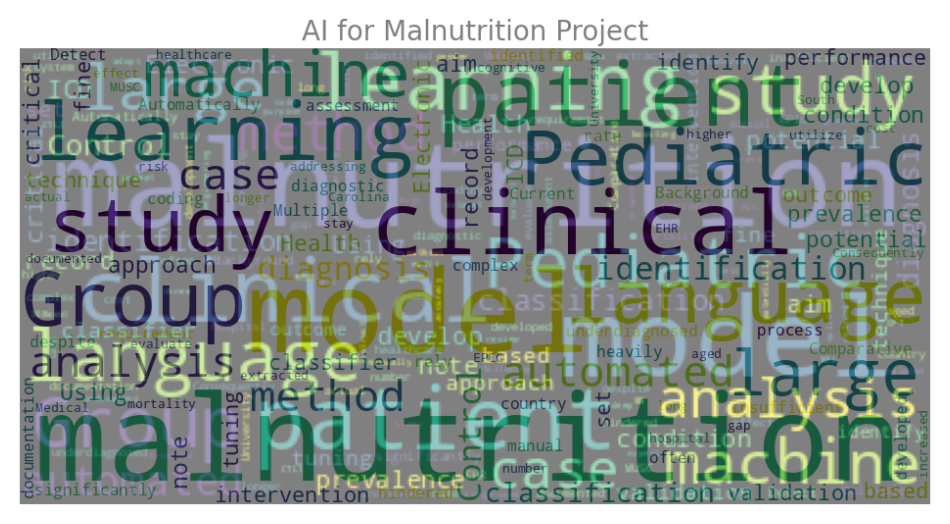

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(_mask, cmap=plt.cm.gray, interpolation='bilinear',alpha=0.5)
plt.axis("off")
plt.show()